In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Get Data

In [21]:
all_data = pd.read_csv('vgsales.csv') #sales are in millions

all_data.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

# Cleanup Data

In [5]:
#all_data.isnull().any()

all_data[all_data.isna().any(axis=1)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01
16493,16496,The Smurfs,3DS,NaN,Action,Unknown,0.00,0.01,0.00,0.00,0.01
16494,16497,Legends of Oz: Dorothy's Return,3DS,2014.0,Puzzle,NaN,0.00,0.01,0.00,0.00,0.01
16543,16546,Driving Simulator 2011,PC,2011.0,Racing,NaN,0.00,0.01,0.00,0.00,0.01


#### It seems only Year and Publisher columns contain NaNs, in which case it is safe to proceed

### Question 1 - Which platform sold the most games?

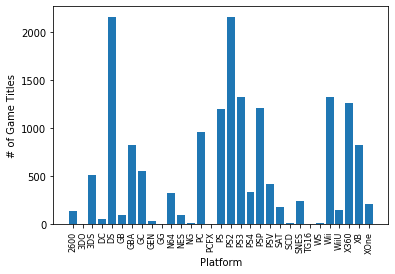

In [18]:
platforms = all_data.groupby('Platform').count()

plt.bar(platforms.index, platforms['Rank'])
plt.ylabel('# of Game Titles')
plt.xlabel('Platform')
plt.xticks(platforms.index, rotation='vertical', size=8)
plt.show()

In [30]:
print('DS =', platforms.loc['DS', 'Rank'])
print('PS2 =', platforms.loc['PS2', 'Rank'])

DS = 2163
PS2 = 2161


### Answer 1 - DS had the most game titles

### Question 2 - Which platform sold the most games for each year? 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


ValueError: shape mismatch: objects cannot be broadcast to a single shape

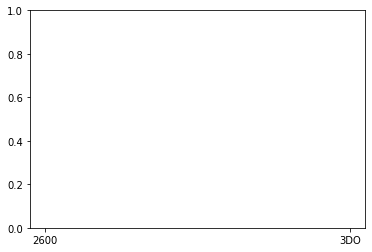

In [35]:
sales = all_data.groupby('Platform')['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'].sum()

ind = range(len(sales.index))
width = 0.3

fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, sales['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'])
plt.bar(sales.index, sales)
plt.ylabel('Sales in mlns')
plt.xlabel('Platform')
plt.xticks(sales.index, rotation='vertical', size=8)
plt.show()

### Question 3 - Show a graph of platform popularity over the years

### Question 4 - Which genre was most popular for PS4?